# 3. Linear Regression – Applied

In [2]:
from pathlib import Path
import pandas as pd
import statsmodels.api  as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats
plt.style.use('classic') # pretty matplotlib plots
sns.set_style(style='white')

warnings.filterwarnings('ignore')

### Q8. This question involves the use of simple linear regression on the Auto data set.

In [4]:
path = Path('Data/Auto.csv')
Auto = pd.read_csv(path)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### **(a)** Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:

- i. Is there a relationship between the predictor and the response?
- ii. How strong is the relationship between the predictor and the response?
- iii. Is the relationship between the predictor and the response positive or negative?
- iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [6]:
data = Auto[['horsepower', 'mpg']].sort_values('horsepower')
X1 = data['horsepower']
Y = data['mpg']
X = sm.add_constant(X1)

(0.0, 250.0)

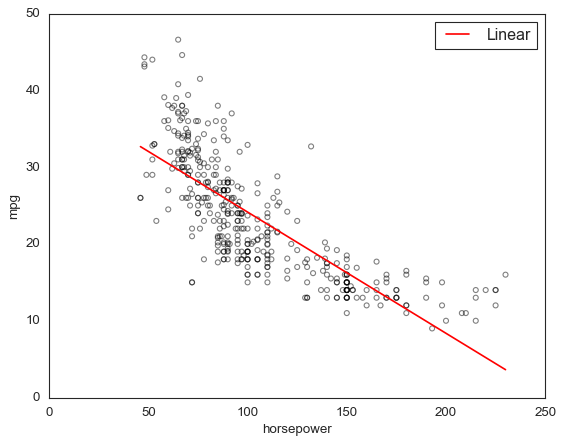

In [7]:
axes = sns.regplot(X1, Y, ci=None, label='Linear', scatter=False, color='red')
axes.scatter(X1, Y, facecolors='None', edgecolors='k', alpha=.5)
axes.legend()
axes.set_xlim([0, 250])

In [8]:
results = sm.OLS(Y,X).fit()

In [9]:
results.params

const         39.935861
horsepower    -0.157845
dtype: float64

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           7.03e-81
Time:                        12:04:03   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i. Is there a relationship between the predictor and the response? 
> We can answer this question by testing the null hypothesis. 
The p-value corresponding to the F-statistic is very small, indicating a clear evidence of a relationship between mpg and horsepower.

ii. How strong is the relationship between the predictor and the response?
> We can use the residual standard error and the R-squared value for answering this question.
The mean of mpg is 23.5. The RSE of the fit was 4.9 which indicates a percentage error of about 20.9%. 
We may also note that as the R$^2$ is equal to 0.6, almost 60.5948258% of the variability in mpg can be explained 
using horsepower.

>In Python statsmodel we can calculate residual standard error or the residual standard deviation by taking the square root of the scale attribute:
print(np.sqrt(results.scale))
Or we can calculate mannually: 
print(np.sqrt(np.divide(results.ssr, np.subtract(len(Auto), 2))))

iii. Is the relationship between the predictor and the response positive or negative?
>This is can be answered by looking at the plotted regression line or the regression coeficient. 
Since horsepower is negative the relationship is also negative, meaning that more horsepower results in less mpg.

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% conﬁdence and prediction intervals?

In [11]:
ex = [1, 98]
pred1 = results.get_prediction(ex).summary_frame(alpha=0.05)
print(f"The predicted mpg associated with {ex[1]} is {pred1['mean'][0]:.2f}.")

The predicted mpg associated with 98 is 24.47.


In [12]:
print(f"The associated confidence and prediction intervals are: [{pred1['mean_ci_lower'][0]:.2f}, {pred1['mean_ci_upper'][0]:.2f}] and [{pred1['obs_ci_lower'][0]:.2f}, {pred1['obs_ci_upper'][0]:.2f}]")

The associated confidence and prediction intervals are: [23.97, 24.96] and [14.81, 34.12]


#### **(b)** Plot the response and the predictor. Use the abline() function to display the least squares regression line.

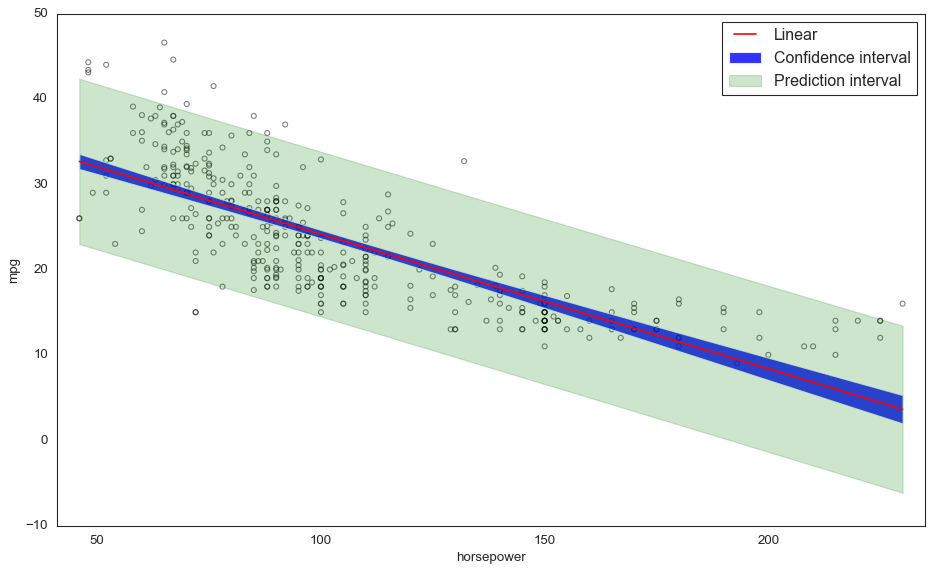

In [13]:
# Plotting the the linear regression with confidence and prediction intervals
pred2 = results.get_prediction(X).summary_frame(alpha=0.05)

fig = plt.figure(figsize=(14,8))
axes = sns.regplot(X1, Y, ci=None, label='Linear', scatter=False, color='red')

axes.scatter(X1, Y, facecolors='None', edgecolors='k', alpha=.5)
axes.fill_between(X1, pred2['mean_ci_lower'], pred2['mean_ci_upper'], alpha=.8, label='Confidence interval')
axes.fill_between(X1, pred2['obs_ci_lower'], pred2['obs_ci_upper'], alpha=.2, label='Prediction interval', color='green')


axes.set_xlim([X1.min()-5, X1.max()+5])
axes.legend()

#### **(c)** Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

**Regression assumptions**
Linear regression makes several assumptions about the data, such as :

* Linearity of the data. The relationship between the predictor (x) and the outcome (y) is assumed to be linear.
* Normality of residuals. The residual errors are assumed to be normally distributed.
* Homogeneity of residuals variance. The residuals are assumed to have a constant variance (homoscedasticity)
* Uncorrelated residuals.

In [14]:
def diagnostic_plots(results):
    fitted_values = results.fittedvalues
    residuals = results.resid
    studentized_residuals = results.get_influence().resid_studentized_external
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(studentized_residuals))
    # leverage, from statsmodels internals
    model_leverage = results.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = results.get_influence().cooks_distance[0]


    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(14, 14))

    # Residual vs Fitted
    sns.regplot(fitted_values, residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax1);

    ax1.scatter(fitted_values, residuals, alpha=0.5);
    ax1.set_title('Residuals vs Fitted')
    ax1.set_xlabel('Fitted values')
    ax1.set_ylabel('Residuals');

    # Q-Q plot
    QQ = ProbPlot(studentized_residuals)
    QQ.qqplot(line='45', alpha=0.5, color='blue', lw=1, ax=ax2)
    ax2.set_title('Normal Q-Q')
    ax2.set_xlabel('Theoretical Quantiles')
    ax2.set_ylabel('Sample Quantiles');

    # Scale-location
    sns.regplot(fitted_values, model_norm_residuals_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax3);
    ax3.scatter(fitted_values, model_norm_residuals_abs_sqrt, alpha=0.5);
    ax3.set_title('Scale-Location')
    ax3.set_xlabel('Fitted values')
    ax3.set_ylabel('$\sqrt{|Standardized Residuals|}$');

    # Residuals vs Leverage
    sns.regplot(model_leverage, studentized_residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=ax4);

    ax4.scatter(model_leverage, studentized_residuals, alpha=0.5);
    ax4.axhline(y=3, color='red', linestyle='--')
    ax4.axhline(y=-3, color='red', linestyle='--')
    ax4.set_title('Residuals vs Leverage')
    ax4.set_xlabel('Leverage')
    ax4.set_ylabel('Studentized Residuals');


    fig.tight_layout()
    plt.show()


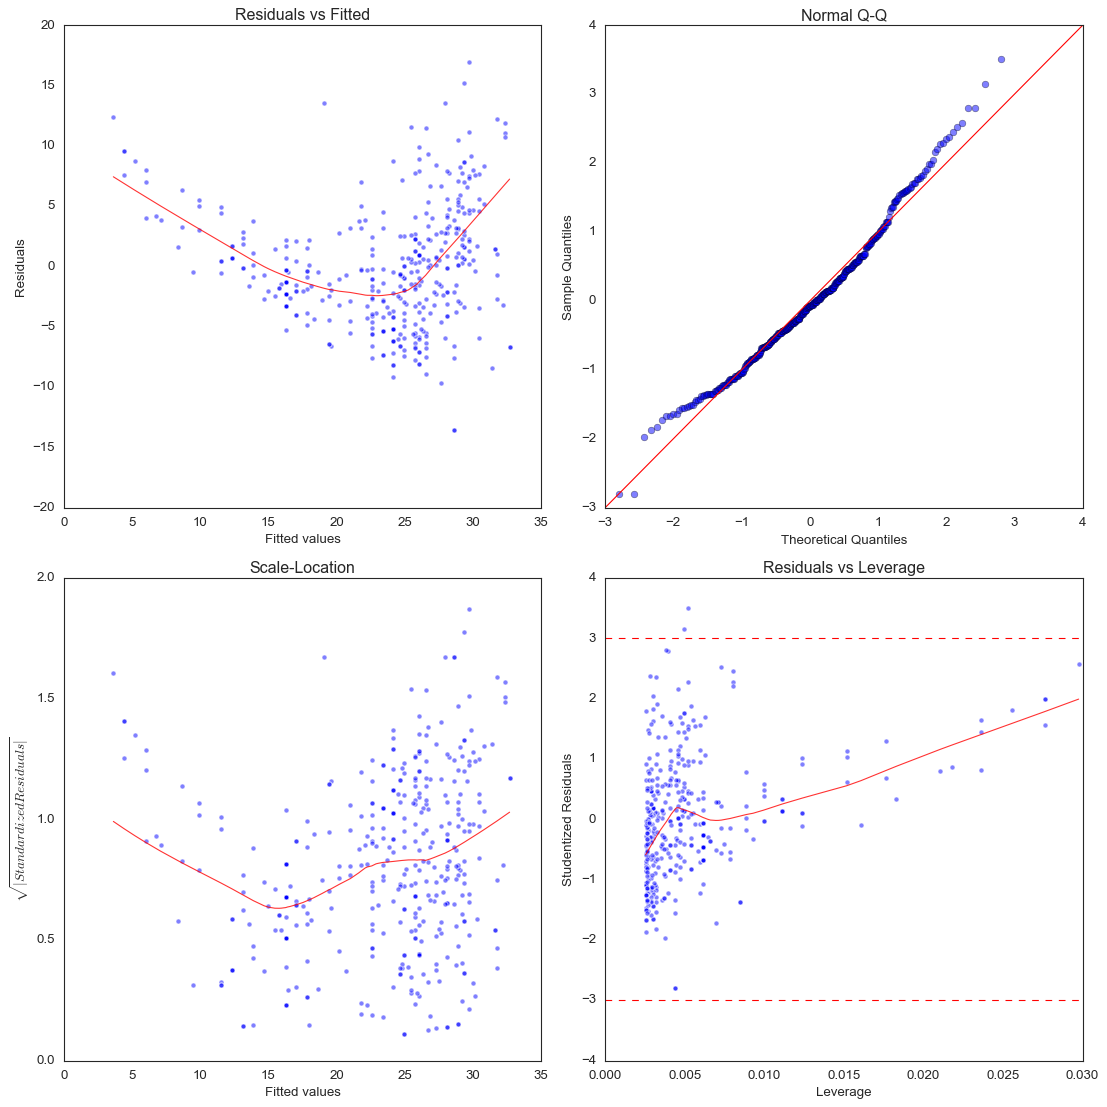

In [15]:
diagnostic_plots(results)

The diagnostic plots show residuals in four different ways:

* **Residuals vs Fitted:** used to check the linear relationship assumptions. A horizontal line, without distinct patterns is an indication for a linear relationship, what is good. Also if a funnel shape can be identified in the distribution of the residuals, than heteroskedasticity (non-constant variance of residuals) may be present.

* **Normal Q-Q:** used to examine whether the residuals are normally distributed. It’s good if residuals points follow the straight dashed line.

* **Scale-Location (or Spread-Location):** used to check the homogeneity of variance of the residuals (homoscedasticity). Horizontal line with equally spread points is a good indication of homoscedasticity.

* **Residuals vs Leverage:** used to identify influential cases, that is extreme values that might influence the regression results when included or excluded from the analysis. This plot will be described further in the next sections.

**Interpretation:**

* The residual vs fitted plot clearly shows the violation of the linear assumption. The model unable to capture the non-linear behavior of the data. Also, a funnel shape is evident in the plot, which suggest non constant variance i.e. heteroskedasticity.
* Based on the Q-Q plot, which follows a roughly straight line, the normal distribution can be assumed.
* The heteroskedasticity can be identified with the scale-location plot too.
* Outliers and high leverage points can be identified using the residula vs leverage plot. Points with absolute studentized residual value greater, than 3 may be considered as an outlier (in this case, two datapoints may be outliers). High leverage points appear at the far right side of the plot. Also, few high leverage points can be identified in the example.

### Q9. This question involves the use of multiple linear regression on the Auto data set.

#### **(a)** Produce a scatterplot matrix which includes all of the variables in the data set.

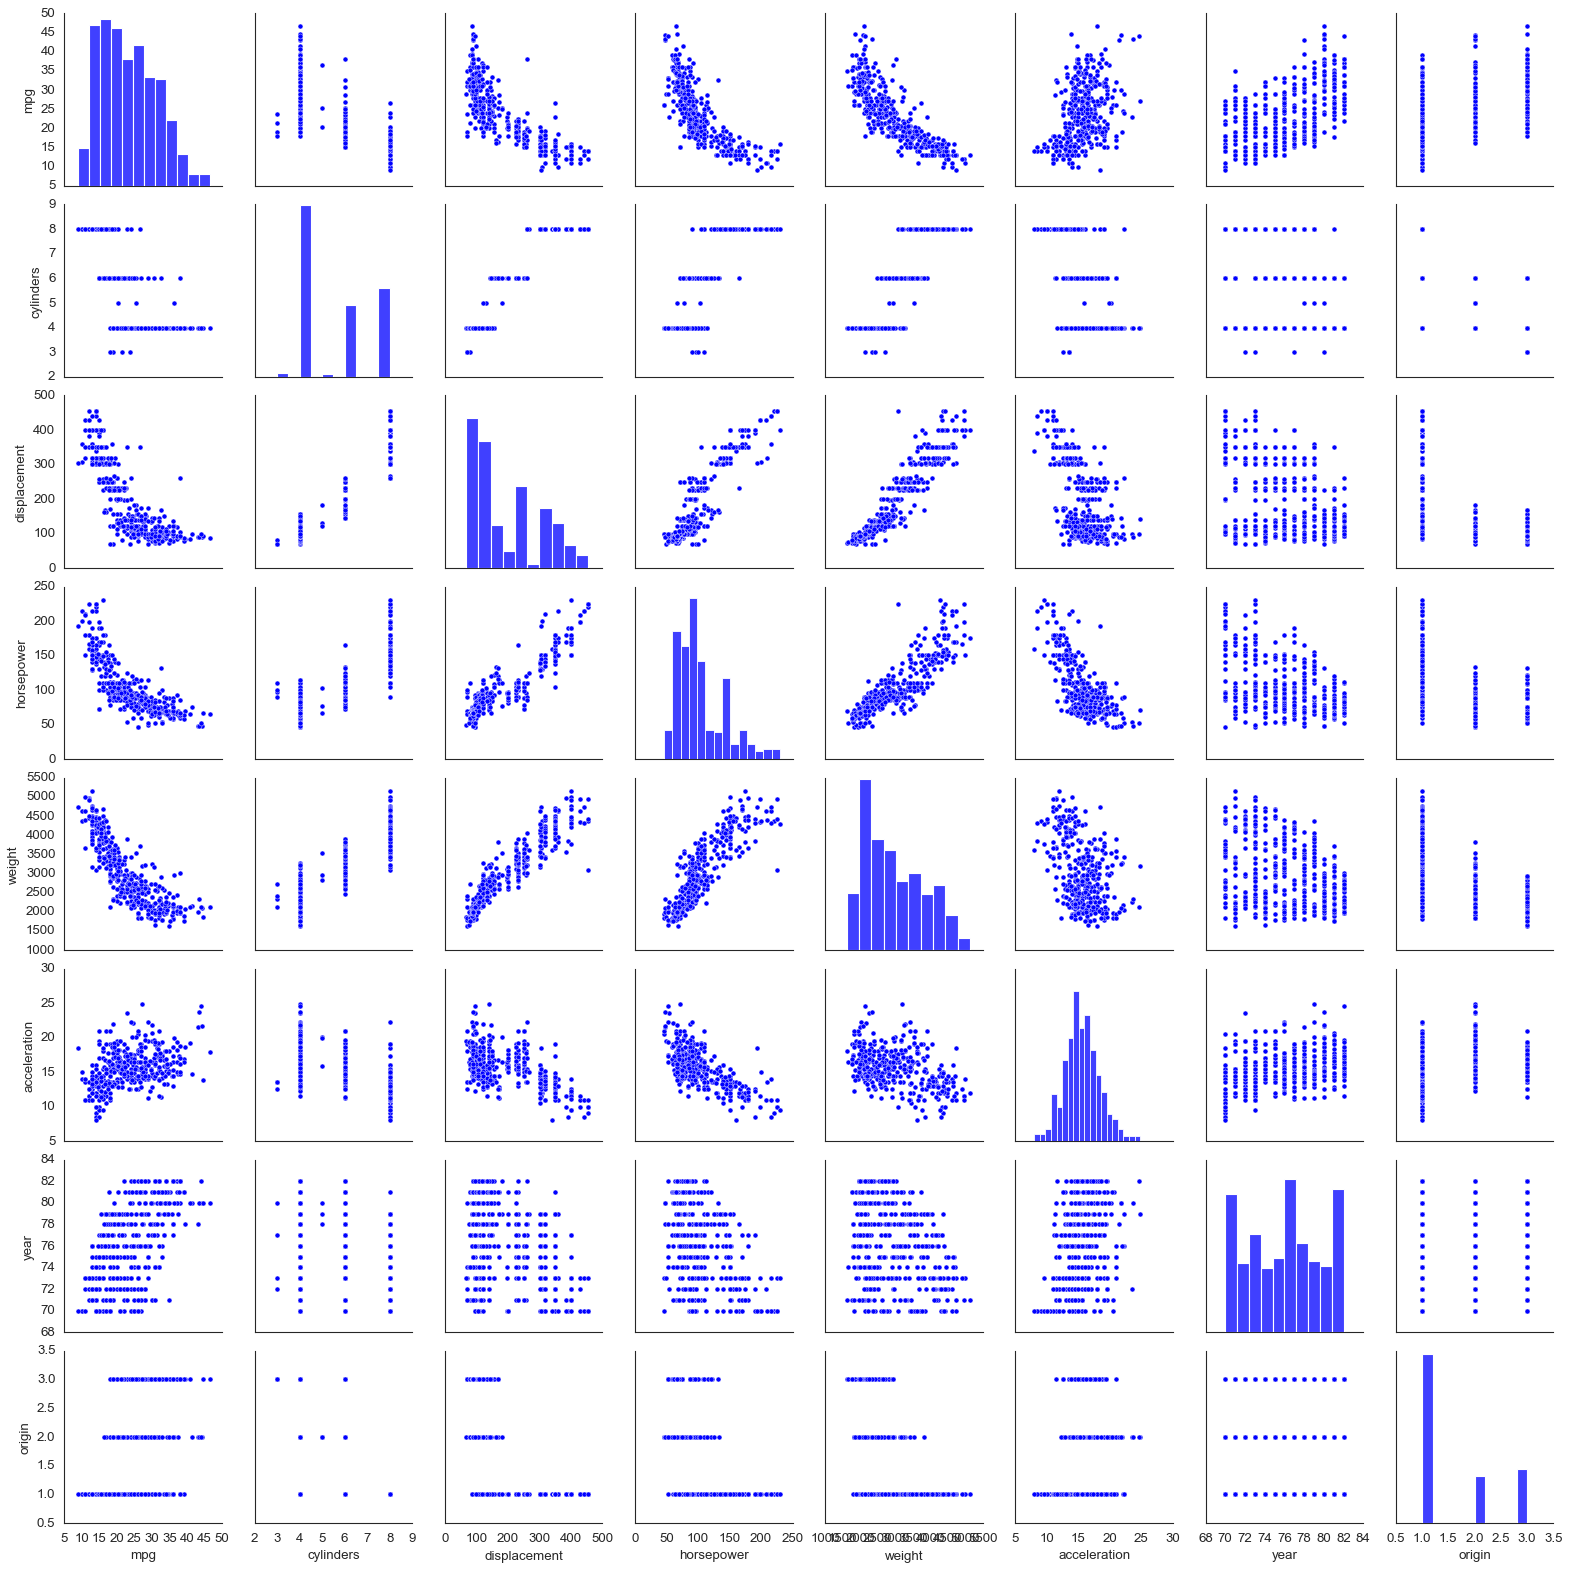

In [16]:
sns.pairplot(Auto);

#### **(b)** Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

In [17]:
corrM = Auto.drop(['name'], axis=1).corr()
corrM.style.background_gradient(cmap='coolwarm').set_precision(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00


#### (c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:

1. Is there a relationship between the predictors and the response?
2. Which predictors appear to have a statistically significant relationship to the response?
3. What does the coefficient for the year variable suggest?

In [107]:
data = Auto.drop(['name'], axis=1)
X1 = data.drop(['mpg'], axis=1)
Y = data['mpg']
X = sm.add_constant(X1)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          2.04e-139
Time:                        13:43:35   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that displacement, weight, year and origin hasve sufficiently low p-values. However the correlation plot suggest high correlation among some predictor variables (e.g. displacement ~ weight, displacement ~ cylinders, cylinders ~ horsepower), which may result to mullticollinearity. We can further prove this by calculating the variance inflation factor. But first the predictor values must be centered or standardized.

In [108]:
def centerize(series):
    return (series - series.mean())

def standardize(series):
    return (series - series.mean()) / series.std()

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculating the centerized values, origin is dropped, because it is practically a categorical variable
X1 = data.drop(['mpg', 'origin'], axis=1)
X1[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']] = centerize(X1[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']])

# Creating a dataframe of Variance inflation factors
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif

,VIF Factor,features
0,10.630874,cylinders
1,19.535261,displacement
2,8.916923,horsepower
3,10.430838,weight
4,2.609517,acceleration
5,1.000460,year


In practice, variables with VIF higher than 5 is considered highly correlated with the other predictors. Here, displacement has the highest VIF, also the correlation matrix suggest this. Let's fit the model again, without the displacement variable. Ofcourse, in our dataset, it is evident, that cylinders, horsepower, weight and displacement are extremely correlated with each other. In the followings I will drop displacement as it has the highest VIF score.

In [110]:
# Calculating the centerized values, origin is dropped, because it is practically a categorical variable
X1 = X1.drop(['displacement'], axis=1)
# Creating a dataframe of Variance inflation factors
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif

,VIF Factor,features
0,5.815845,cylinders
1,8.306405,horsepower
2,8.449841,weight
3,2.580328,acceleration
4,1.000450,year


In [111]:
# Fitting the model without the displacement parameter
Y = Auto['mpg']
# Adding the origin variable ad a constant
X1['origin'] = Auto['origin']
X = sm.add_constant(X1)

results_ml = sm.OLS(Y, X).fit()
results_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     288.8
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          3.67e-139
Time:                        13:43:37   Log-Likelihood:                -1027.0
No. Observations:                 392   AIC:                             2068.
Df Residuals:                     385   BIC:                             2096.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -34.7936      3.907     -8.906      0.000     -42.475     -27.112
cylinders        0.0746      0.244      0.306      0.760      -0.405       0.554
horsepower      -0.0062      0.013     -0.470      0.638      -0.032       0.020
weight          -0.0058      0.001     -9.580      0.000      -0.007      -0.005
acceleration     0.0538      0.099      0.543      0.587      -0.141       0.249
year             0.7418      0.051     14.472      0.000       0.641       0.843
origin           1.1927      0.266      4.487      0.000       0.670       1.715
==============================================================================
Omnibus:                       35.452   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.984
Skew:                           0.562   Prob(JB):                     3.47e-14
Kurtosis:                       4.591   Cond. No.                     1.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. Is there a relationship between the predictor and the response? 
> We can answer this question by testing the null hypothesis. The p-value corresponding to the F-statistic is very small, indicating a clear evidence of a relationship between the predictors and the response variables.

ii. Which predictors appear to have a statistically significant relationship to the response?
> weight, year and origin variables have p-values less than 0.05, which means they are statistically significant.

iii. What does the coefficient for the year variable suggest?
> The coefficient ot the year variable suggests that the average effect of an increase of 1 year is an increase of 0.74 in mpg (all other predictors remaining constant). In other words, cars become more fuel efficient every year by almost 0.75 mpg / year.

#### (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

In [112]:
fitted_values_ml = results_ml.fittedvalues
residuals_ml = results_ml.resid
studentized_residuals_ml = results_ml.get_influence().resid_studentized_external
model_norm_residuals_abs_sqrt_ml = np.sqrt(np.abs(studentized_residuals_ml))
# leverage, from statsmodels internals
model_leverage_ml = results_ml.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks_ml = results_ml.get_influence().cooks_distance[0]

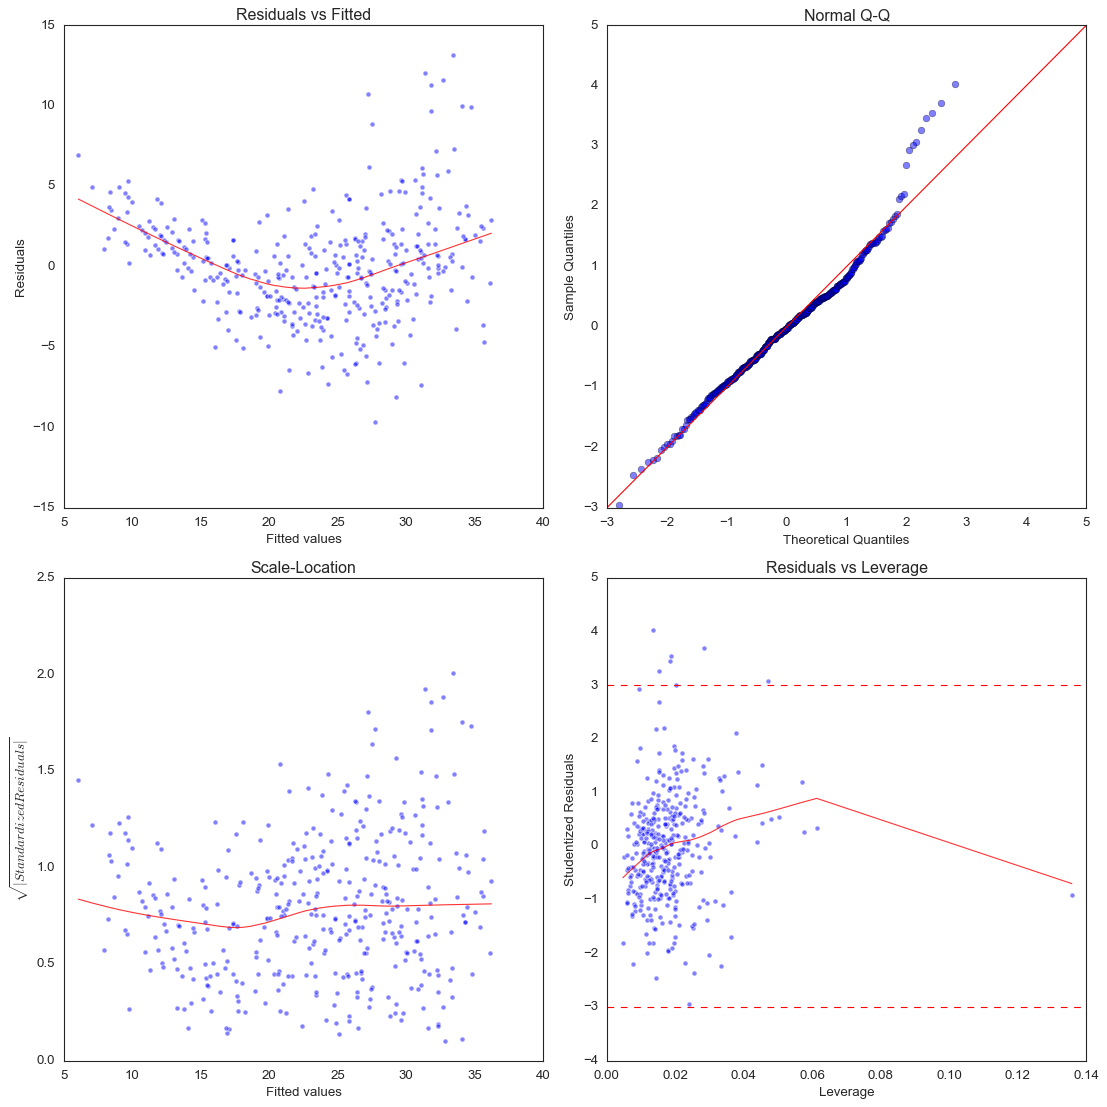

In [113]:
diagnostic_plots(results_ml)

**Interpretation:**

* The residual vs fitted plot clearly shows the violation of the linear assumption. The model unable to capture the non-linear behavior of the data. Also, a funnel shape is evident in the plot, which suggest non constant variance i.e. heteroskedasticity. Although, the multiple linear model suggest much better fit, than the single predictor model.
* Based on the Q-Q plot, which follows a roughly straight line, the normal distribution can be assumed.
* The scale-location plot suggest minimal heteroscedasticity.
* Outliers and high leverage points can be identified using the residula vs leverage plot. Points with absolute studentized residual value greater, than 3 may be considered as an outlier (in this case, fwe datapoints may be outliers). High leverage points appear at the far right side of the plot. One high leverage point can be identified.

#### (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
& 
#### (f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.

Based on the results of exercire (c) I will use weight, origin, and their interaction terms as predictors.

In [114]:
X['weight*horsepower'] = X['weight']*X['horsepower']
X['weight*year'] = X['weight']*X['year']
X = X.drop(['acceleration', 'cylinders'], axis=1)
Y = np.log(Y)

In [115]:
results_int = sm.OLS(Y, X).fit()
results_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     516.2
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          1.16e-180
Time:                        13:43:44   Log-Likelihood:                 298.76
No. Observations:                 392   AIC:                            -583.5
Df Residuals:                     385   BIC:                            -555.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7575      0.142      5.318      0.000       0.477       1.037
horsepower           -0.0020      0.000     -5.745      0.000      -0.003      -0.001
weight               -0.0002      0.000     -0.809      0.419      -0.001       0.000
year                  0.0298      0.002     16.001      0.000       0.026       0.034
origin                0.0238      0.009      2.627      0.009       0.006       0.042
weight*horsepower  1.224e-06   2.24e-07      5.470      0.000    7.84e-07    1.66e-06
weight*year       -1.181e-06   2.53e-06     -0.468      0.640   -6.15e-06    3.79e-06
==============================================================================
Omnibus:                        5.248   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                6.944
Skew:                          -0.062   Prob(JB):                       0.0311
Kurtosis:                       3.640   Cond. No.                     1.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

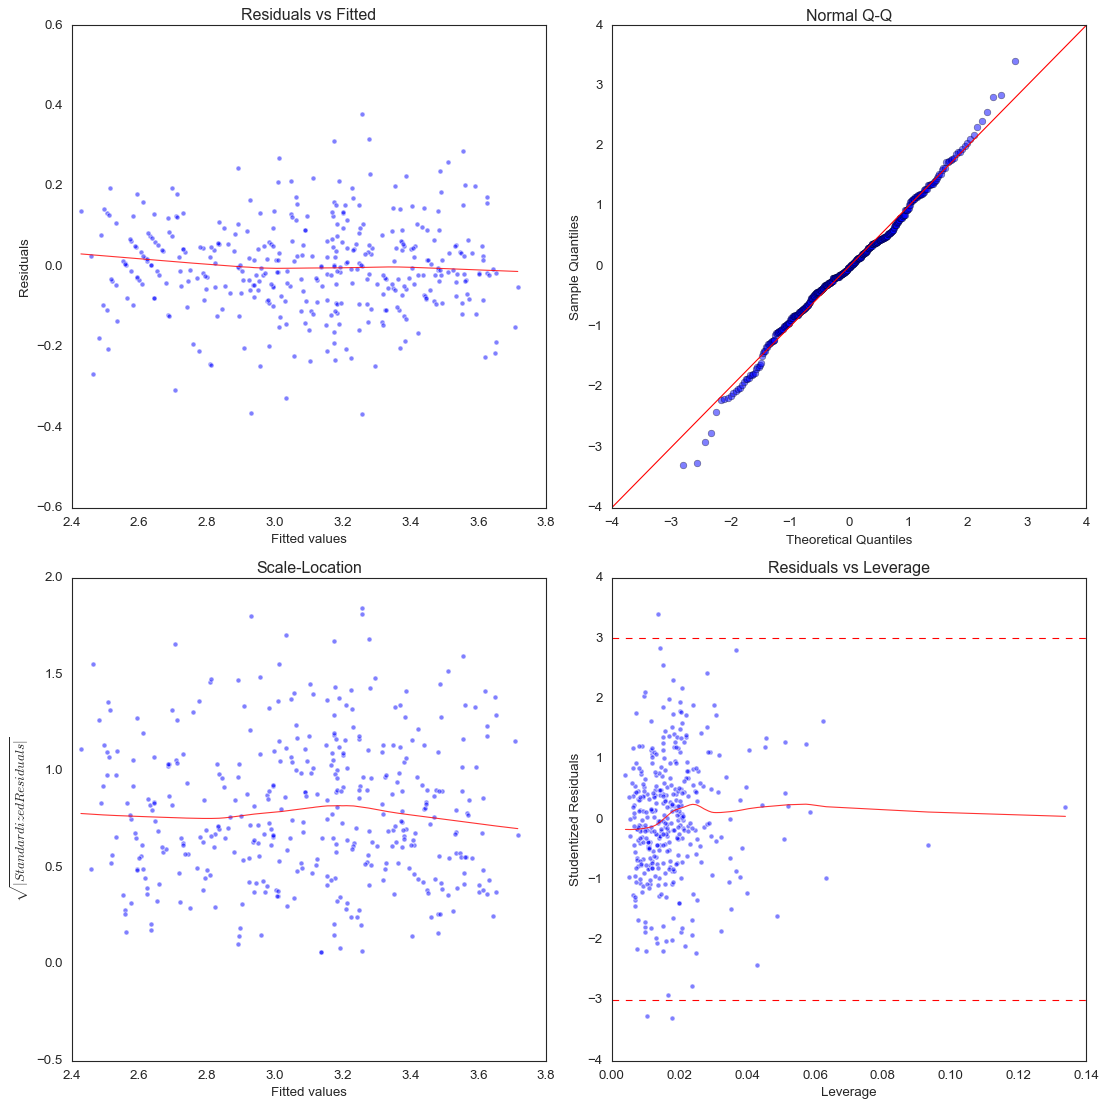

In [116]:
diagnostic_plots(results_int)

### 10. This question should be answered using the Carseats data set.

#### (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [209]:
path = Path('Data/Carseats.csv')
data = pd.read_csv(path)
Seats = data
Seats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [210]:
# Convert categorical values
Seats["Urban"] = Seats["Urban"].astype('category')
Seats["US"] = Seats["US"].astype('category')
Seats["Urban"] = Seats["Urban"].cat.codes
Seats["US"] = Seats["US"].cat.codes
Seats["ShelveLoc"] = Seats["ShelveLoc"].map({'Bad':1, 'Medium':2, 'Good':3})

In [211]:
Y = Seats[['Sales']]
X = sm.add_constant(Seats)

results_1 = sm.OLS(Y, X[['Price', 'Urban', 'US', 'const']]).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           2.39e-23
Time:                        14:58:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
const         13.0435      0.651     20.036      0.000      11.764      14.323
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

* If prices rise with 1 unit (e.g. 1 USD), on average, the sales will decrease with 54 units (sales are in thousands units).
* If the store is located in the US, then sales will increase 1200 units.
* There does not seem to be significant relationship between Sales and wheter the store is in an urban or rural relationship.

#### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

$\hat{y} = 13.0435 + (-0.0219 \times Urban) + (1.2006 \times US) + (-0.0545 \times Price) $

Where Urban and US are encoded as dummy variables:

- Urban: Yes => 1
- Urban:No   => 0
- US: Yes    => 1
- US: No     => 0

#### (d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

Price and US seems significant, therefore the null hypothesis can be rejected for these variables

#### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [212]:
results_2 = sm.OLS(Y, X[['const', 'Price', 'US']]).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           2.66e-24
Time:                        14:58:40   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (f) How well do the models in (a) and (e) fit the data?

Both model are only able to explain ~24% of the variance in dependent variable caused by the predictors.

### (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [217]:
results_2.conf_int(alpha=0.05).rename(index=str, columns={0: "min.", 1: "max.",})

,min.,max.
const,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


### (h) Is there evidence of outliers or high leverage observations in the model from (e)?

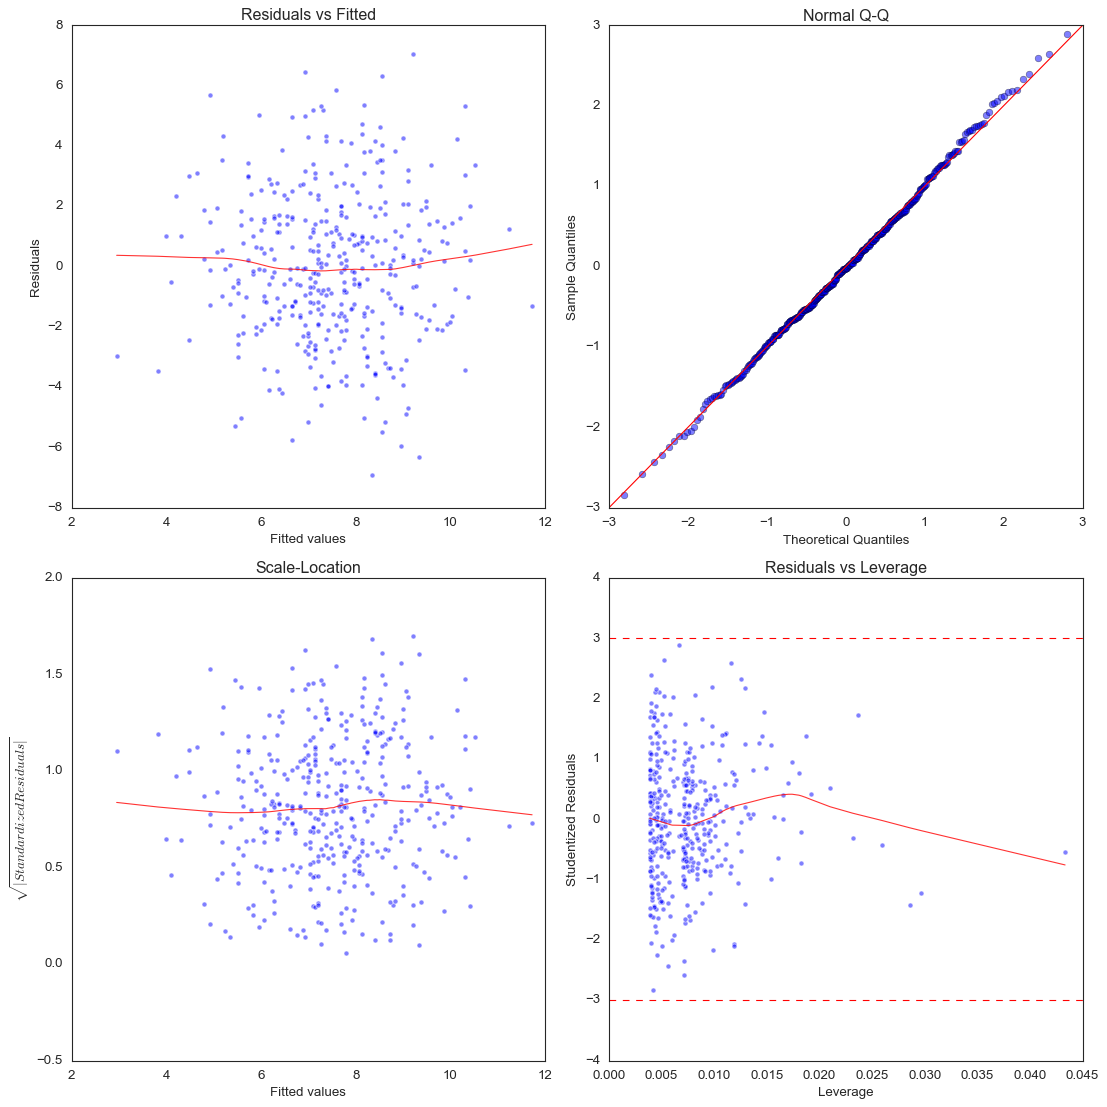

In [218]:
diagnostic_plots(results_2)

Based on the Residuals vs Leverage plots, there are few outliers near the -3 and 3 values, but non of them ex. There is one particularly high levergae point, however it is not an outlier.